# Look for a decrease in $\sigma(\Sigma m_\nu)$ with increasing redshift

In [177]:
import crosspower as cp
import FisherCl as fcl # branch quickCl
#import camb

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

In [178]:
# load saved Fobj
# get lensing and galaxy Fisher matrix

import FisherCl as fcl
import crosspower as cp
import pickle

#filehandler = open('Fisher_4_1Y.obj','r') # AccuracyBoost=3, lmax=3000, lmaxP=5000; nz=3e5; nonlinear=True,
#neutrino_hierarchy = 'normal', usePrimaryCMB = True; from FisherCl branch quickCl
# this one used fiducial params and values to match CMB-S4 Science book verification table 8.1

#filehandler = open('Fisher_7_6X.obj','r') # AccuracyBoost=3, lmax=2000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'normal', usePrimaryCMB = False; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use modelDNDZ3; set cp.tophat beesBins=True

#filehandler = open('Fisher_7_6X_n1.obj','r') # AccuracyBoost=3, lmax=2000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'normal', usePrimaryCMB = False; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use modelDNDZ3; set cp.tophat beesBins=True
# n1 for noise1; has kk noise but no gg

filehandler = open('Fisher_7_6X_n2.obj','r') # AccuracyBoost=3, lmax=2000, nz=3e5; nonlinear=False,
#neutrino_hierarchy = 'normal', usePrimaryCMB = False; from FisherCl branch quickCl
# kludge for this one: told cp.getDNDZinterp to use modelDNDZ3; set cp.tophat beesBins=True
# n2 for noise2; has kk noise and gg

Fobj = pickle.load(filehandler) 


lmin = Fobj.lmin
lmax = Fobj.lmax
nMaps = Fobj.nBins + 1
nCosParams = Fobj.nParams - Fobj.nBins
ells = Fobj.ells
obsNames = Fobj.obsNames
paramList = Fobj.paramList

print Fobj.obsList
print Fobj.obsNames
print Fobj.paramList


[ 0.  1.  2.  3.  4.  5.  6.  8.  9. 10. 11. 12. 13. 16. 17. 18. 19. 20.
 24. 25. 26. 27. 32. 33. 34. 40. 41. 48.]
['k,k', 'k,g1', 'k,g2', 'k,g3', 'k,g4', 'k,g5', 'k,g6', 'g1,g1', 'g1,g2', 'g1,g3', 'g1,g4', 'g1,g5', 'g1,g6', 'g2,g2', 'g2,g3', 'g2,g4', 'g2,g5', 'g2,g6', 'g3,g3', 'g3,g4', 'g3,g5', 'g3,g6', 'g4,g4', 'g4,g5', 'g4,g6', 'g5,g5', 'g5,g6', 'g6,g6']
['ombh2', 'omch2', 'cosmomc_theta', 'As', 'ns', 'tau', 'mnu', 'w', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6']


In [179]:
# Get sigmas for reduced number of bins
# start with full set
lminF = 50
lmaxFa = 2000
lmaxFb = 1000
fsky = 0.4

def getSigmas(Fij):
    return np.sqrt(np.diag(np.linalg.inv(Fij)))
    
Fij6a = Fobj.makeFisher(lminF,lmaxFa)
Fij6b = Fobj.makeFisher(lminF,lmaxFb)

Fij6a *= fsky
Fij6b *= fsky

sigmas6a = getSigmas(Fij6a)
sigmas6b = getSigmas(Fij6b)

dClVecs = Fobj.dClVecs
invCov = Fobj.invCov
print dClVecs.shape
print invCov.shape

nCls = nMaps*(nMaps+1)/2
nParams = Fobj.nParams
print nCls, nParams

(28, 14, 1999)
(28, 28, 1999)
28 14


In [180]:
# use obsList to find which vector and matrix elements have g6
# base nMaps code
def getMapNums(obsList,nMaps):
    map1 = np.floor(obsList/nMaps)
    map2 = Fobj.obsList%nMaps
    return map1,map2

map1,map2= getMapNums(Fobj.obsList,nMaps)
print map1
print map2

selectIndices = np.where(map2==6)
print selectIndices

[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 3. 3. 3. 3. 4. 4.
 4. 5. 5. 6.]
[0. 1. 2. 3. 4. 5. 6. 1. 2. 3. 4. 5. 6. 2. 3. 4. 5. 6. 3. 4. 5. 6. 4. 5.
 6. 5. 6. 6.]
(array([ 6, 12, 17, 21, 24, 26, 27]),)


In [181]:
def trimVecs(dClVecs,invCov,obsList,obsNames,map2,selectIndices):
    dCl=dClVecs;iC=invCov;oL=obsList;oN=obsNames
    for si in np.flip(selectIndices,0): #flip so indices still line up correctly
        iC = np.delete(np.delete(iC,si,0),si,1)
        dCl = np.delete(dCl,si,0)
        oL = np.delete(oL,si)
        oN = np.delete(oN,si)
        map2 = np.delete(map2,si)
    return dCl,iC,oL,oN,map2

dClVecs5,invCov5,obsList5,obsNames5,map2_5 = trimVecs(dClVecs,invCov,Fobj.obsList,Fobj.obsNames,map2,selectIndices)
print obsList5
print obsNames5
print map2_5
        
dClVecs5 = dClVecs5[:,:-1,:]

print dClVecs5.shape
print invCov5.shape

[ 0.  1.  2.  3.  4.  5.  8.  9. 10. 11. 12. 16. 17. 18. 19. 24. 25. 26.
 32. 33. 40.]
['k,k' 'k,g1' 'k,g2' 'k,g3' 'k,g4' 'k,g5' 'g1,g1' 'g1,g2' 'g1,g3' 'g1,g4'
 'g1,g5' 'g2,g2' 'g2,g3' 'g2,g4' 'g2,g5' 'g3,g3' 'g3,g4' 'g3,g5' 'g4,g4'
 'g4,g5' 'g5,g5']
[0. 1. 2. 3. 4. 5. 1. 2. 3. 4. 5. 2. 3. 4. 5. 3. 4. 5. 4. 5. 5.]
(21, 13, 1999)
(21, 21, 1999)


In [182]:
Fobj.invCov = invCov5
Fobj.dClVecs = dClVecs5
Fobj.nParams = 13
Fij5a = Fobj.makeFisher(lminF,lmaxFa)
Fij5b = Fobj.makeFisher(lminF,lmaxFb)

Fij5a *= fsky
Fij5b *= fsky

sigmas5a = getSigmas(Fij5a)
sigmas5b = getSigmas(Fij5b)
print 'done.'

done.


In [183]:
selectIndices = np.where(map2_5==5)
print selectIndices

dClVecs4,invCov4,obsList4,obsNames4,map2_4 = trimVecs(dClVecs5,invCov5,obsList5,obsNames5,map2_5,selectIndices)
print obsList4
print obsNames4
print map2_4

dClVecs4 = dClVecs4[:,:-1,:]
      
print dClVecs4.shape
print invCov4.shape

Fobj.invCov = invCov4
Fobj.dClVecs = dClVecs4
Fobj.nParams = 12
Fij4a = Fobj.makeFisher(lminF,lmaxFa)
Fij4b = Fobj.makeFisher(lminF,lmaxFb)
Fij4a *= fsky
Fij4b *= fsky
sigmas4a = getSigmas(Fij4a)
sigmas4b = getSigmas(Fij4b)
print 'done.'

(array([ 5, 10, 14, 17, 19, 20]),)
[ 0.  1.  2.  3.  4.  8.  9. 10. 11. 16. 17. 18. 24. 25. 32.]
['k,k' 'k,g1' 'k,g2' 'k,g3' 'k,g4' 'g1,g1' 'g1,g2' 'g1,g3' 'g1,g4' 'g2,g2'
 'g2,g3' 'g2,g4' 'g3,g3' 'g3,g4' 'g4,g4']
[0. 1. 2. 3. 4. 1. 2. 3. 4. 2. 3. 4. 3. 4. 4.]
(15, 12, 1999)
(15, 15, 1999)
done.


In [184]:
selectIndices = np.where(map2_4==4)
print selectIndices

dClVecs3,invCov3,obsList3,obsNames3,map2_3 = trimVecs(dClVecs4,invCov4,obsList4,obsNames4,map2_4,selectIndices)
print obsList3
print obsNames3
print map2_3

dClVecs3 = dClVecs3[:,:-1,:]

print dClVecs3.shape
print invCov3.shape

Fobj.invCov = invCov3
Fobj.dClVecs = dClVecs3
Fobj.nParams = 11
Fij3a = Fobj.makeFisher(lminF,lmaxFa)
Fij3b = Fobj.makeFisher(lminF,lmaxFb)
Fij3a *= fsky
Fij3b *= fsky
sigmas3a = getSigmas(Fij3a)
sigmas3b = getSigmas(Fij3b)
print 'done.'

(array([ 4,  8, 11, 13, 14]),)
[ 0.  1.  2.  3.  8.  9. 10. 16. 17. 24.]
['k,k' 'k,g1' 'k,g2' 'k,g3' 'g1,g1' 'g1,g2' 'g1,g3' 'g2,g2' 'g2,g3'
 'g3,g3']
[0. 1. 2. 3. 1. 2. 3. 2. 3. 3.]
(10, 11, 1999)
(10, 10, 1999)
done.


In [185]:
selectIndices = np.where(map2_3==3)
print selectIndices

dClVecs2,invCov2,obsList2,obsNames2,map2_2 = trimVecs(dClVecs3,invCov3,obsList3,obsNames3,map2_3,selectIndices)
print obsList2
print obsNames2
print map2_2

dClVecs2 = dClVecs2[:,:-1,:]

print dClVecs2.shape
print invCov2.shape

Fobj.invCov = invCov2
Fobj.dClVecs = dClVecs2
Fobj.nParams = 10
Fij2a = Fobj.makeFisher(lminF,lmaxFa)
Fij2b = Fobj.makeFisher(lminF,lmaxFb)
Fij2a *= fsky
Fij2b *= fsky
sigmas2a = getSigmas(Fij2a)
sigmas2b = getSigmas(Fij2b)
print 'done.'

(array([3, 6, 8, 9]),)
[ 0.  1.  2.  8.  9. 16.]
['k,k' 'k,g1' 'k,g2' 'g1,g1' 'g1,g2' 'g2,g2']
[0. 1. 2. 1. 2. 2.]
(6, 10, 1999)
(6, 6, 1999)
done.


In [186]:
selectIndices = np.where(map2_2==2)
print selectIndices

dClVecs1,invCov1,obsList1,obsNames1,map2_1 = trimVecs(dClVecs2,invCov2,obsList2,obsNames2,map2_2,selectIndices)
print obsList1
print obsNames1
print map2_1
        
print dClVecs1.shape
print invCov1.shape

dClVecs1 = dClVecs1[:,:-1,:]

Fobj.invCov = invCov1
Fobj.dClVecs = dClVecs1
Fobj.nParams = 9
Fij1a = Fobj.makeFisher(lminF,lmaxFa)
Fij1b = Fobj.makeFisher(lminF,lmaxFb)
Fij1a *= fsky
Fij1b *= fsky
sigmas1a = getSigmas(Fij1a)
sigmas1b = getSigmas(Fij1b)
print 'done.'

(array([2, 4, 5]),)
[0. 1. 8.]
['k,k' 'k,g1' 'g1,g1']
[0. 1. 1.]
(3, 10, 1999)
(3, 3, 1999)
done.


In [187]:
# collect sigma_mnu values
sigmaMnuA = np.zeros(6)
sigmaMnuB = np.zeros(6)

pNum = 6 #mnu

sigmaMnuA[0] = sigmas1a[pNum]
sigmaMnuB[0] = sigmas1b[pNum]
sigmaMnuA[1] = sigmas2a[pNum]
sigmaMnuB[1] = sigmas2b[pNum]
sigmaMnuA[2] = sigmas3a[pNum]
sigmaMnuB[2] = sigmas3b[pNum]
sigmaMnuA[3] = sigmas4a[pNum]
sigmaMnuB[3] = sigmas4b[pNum]
sigmaMnuA[4] = sigmas5a[pNum]
sigmaMnuB[4] = sigmas5b[pNum]
sigmaMnuA[5] = sigmas6a[pNum]
sigmaMnuB[5] = sigmas6b[pNum]


In [188]:
# save for later
# no noise
#sigmaMnuA_N0 = sigmaMnuA
#sigmaMnuB_N0 = sigmaMnuB

# reconstruction noise
#sigmaMnuA_N1 = sigmaMnuA
#sigmaMnuB_N1 = sigmaMnuB

# reconstruction + shot noise
sigmaMnuA_N2 = sigmaMnuA
sigmaMnuB_N2 = sigmaMnuB


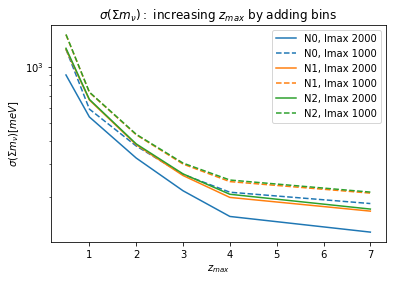

In [189]:
# plot them
zVals = [0.5,1,2,3,4,7]
plt.semilogy(zVals,sigmaMnuA_N0*1000,label='N0, lmax 2000',color='C0')
plt.semilogy(zVals,sigmaMnuB_N0*1000,linestyle = '--',label='N0, lmax 1000',color='C0')
plt.semilogy(zVals,sigmaMnuA_N1*1000,label='N1, lmax 2000',color='C1')
plt.semilogy(zVals,sigmaMnuB_N1*1000,linestyle = '--',label='N1, lmax 1000',color='C1')
plt.semilogy(zVals,sigmaMnuA_N2*1000,label='N2, lmax 2000',color='C2')
plt.semilogy(zVals,sigmaMnuB_N2*1000,linestyle = '--',label='N2, lmax 1000',color='C2')


plt.legend()
plt.xlabel(r'$z_{max}$')
plt.ylabel(r'$\sigma(\Sigma m_\nu) [meV]$')
plt.title(r'$\sigma(\Sigma m_\nu):$ increasing $z_{max}$ by adding bins')
plt.show()

In [190]:
# collect sigma_mnu values
sigmaMnuA = np.zeros(6)
sigmaMnuB = np.zeros(6)

#pNum = 6 #mnu
pNum = 7 #w

sigmaMnuA[0] = sigmas1a[pNum]
sigmaMnuB[0] = sigmas1b[pNum]
sigmaMnuA[1] = sigmas2a[pNum]
sigmaMnuB[1] = sigmas2b[pNum]
sigmaMnuA[2] = sigmas3a[pNum]
sigmaMnuB[2] = sigmas3b[pNum]
sigmaMnuA[3] = sigmas4a[pNum]
sigmaMnuB[3] = sigmas4b[pNum]
sigmaMnuA[4] = sigmas5a[pNum]
sigmaMnuB[4] = sigmas5b[pNum]
sigmaMnuA[5] = sigmas6a[pNum]
sigmaMnuB[5] = sigmas6b[pNum]


In [191]:
# save for later
# no noise
#sigmaWA_N0 = sigmaMnuA
#sigmaWB_N0 = sigmaMnuB

# reconstruction noise
#sigmaWA_N1 = sigmaMnuA
#sigmaWB_N1 = sigmaMnuB

# reconstruction + shot noise
sigmaWA_N2 = sigmaMnuA
sigmaWB_N2 = sigmaMnuB



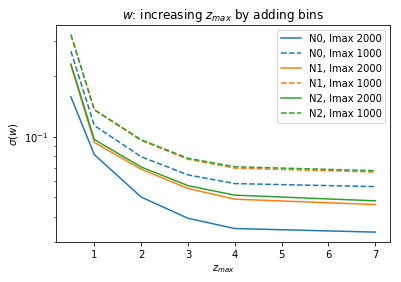

In [192]:
# plot them
zVals = [0.5,1,2,3,4,7]
plt.semilogy(zVals,sigmaWA_N0,label='N0, lmax 2000',color='C0')
plt.semilogy(zVals,sigmaWB_N0,linestyle = '--',label='N0, lmax 1000',color='C0')
plt.semilogy(zVals,sigmaWA_N1,label='N1, lmax 2000',color='C1')
plt.semilogy(zVals,sigmaWB_N1,linestyle = '--',label='N1, lmax 1000',color='C1')
plt.semilogy(zVals,sigmaWA_N2,label='N2, lmax 2000',color='C2')
plt.semilogy(zVals,sigmaWB_N2,linestyle = '--',label='N2, lmax 1000',color='C2')

plt.legend()
plt.xlabel(r'$z_{max}$')
#plt.ylabel(r'$\sigma(\Sigma m_\nu) [meV]$')
plt.ylabel(r'$\sigma(w)$')
plt.title(r'$w$: increasing $z_{max}$ by adding bins')
plt.show()

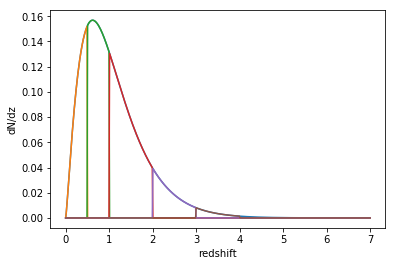

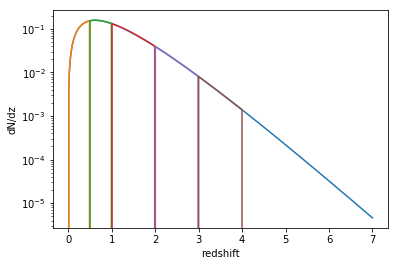

In [5]:
# show the bins
import crosspower as cp
myZs = np.linspace(0,7,500)
myDNDZ = cp.modelDNDZ3(myZs)
nBins = 6
for binNum in range(nBins):
    plt.plot(myZs,cp.tophat(myDNDZ,myZs,0,7,6,binNum,beesBins=True))
    plt.xlabel('redshift')
    plt.ylabel('dN/dz')
plt.show()
for binNum in range(nBins):
    plt.semilogy(myZs,cp.tophat(myDNDZ,myZs,0,7,6,binNum,beesBins=True))
    plt.xlabel('redshift')
    plt.ylabel('dN/dz')
plt.show()

In [6]:
# check kk spectrum
reload(cp)
myPk = cp.MatterPower(nonlinear=False)

neutrino_hierarchy =  normal
zs.size:  9998


calculating window  0 ... 
calculating window  1 ... 
calculating window  2 ... 
calculating window  3 ... 
calculating window  4 ... 
calculating window  5 ... 
window  1 : kappa  0
window  2 : kappa  0
window  1 : kappa  0
window  2 : galaxies  0
window  1 : galaxies  0
window  2 : kappa  0
window  1 : galaxies  0
window  2 : galaxies  0


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/axes/_base.py:2966: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


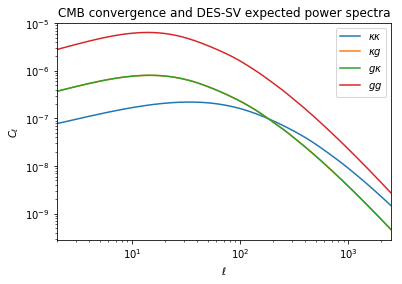

In [9]:
reload(cp)
cp.plotKG(myPk)